In [1]:
%pylab inline
from vocabulary import Vocabulary
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  #交叉验证
from sklearn.metrics import confusion_matrix

import xgboost as xgb
import pandas as pd
import numpy as np
import pickle
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data2_R = pickle.load(open('/www/yang/csv/align/count_C_pickle/mafft_MSA/end_count_C_R_1.pkl','rb'))
data2_H = pickle.load(open('/www/yang/csv/align/count_C_pickle/mafft_MSA/end_count_C_H_3.pkl','rb'))

In [3]:
data1 = pd.read_csv('/home/dldx/R-H/code/classification/ML/data/disorder/MSA_disorder_R_H.csv')
input_lable = np.array(data1.Tier)

In [4]:
# 将21个区域的无规则卷曲长度一起作为特征
all_R_H_IDR =[]
all_R_H_IDR.extend(data2_R)
all_R_H_IDR.extend(data2_H)

In [6]:

# 设置超参数  max_depth：最大深度
param_dict = {"learning_rate": [0.01, 0.1],"max_depth": [5, 8, 15, 25, 30, 50, 100],"random_state":np.arange(0, 31, 3)}
# train_test_split 按比例划分原数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(all_R_H_IDR,input_lable,train_size=0.8,random_state = 20)
# 定义模型
model = xgb.XGBClassifier()
# 将模型加入超参数网格搜索和交叉验证     
model = GridSearchCV(model, param_grid=param_dict, cv=5)
# 训练数据集
model = model.fit(Xtrain, Ytrain)
params = model.best_params_ 
# 模型评估
predict = model.predict(Xtest)
cm = confusion_matrix(Ytest,predict)
tn, tp, fn, fp = cm[0][0], cm[1][1], cm[1][0], cm[0][1]
n = tp + fp + tn + fn
accuracy = (tp + tn)/n 
mcc = ((tp*tn) - (fp*fn))/np.sqrt((tp+fp)*(tn+fn)*(tp+fn)*(tn+fp))
sens = tp/(tp + fn) * 100 if tp + fp != 0 else 0
spec = tn/(tn + fp) * 100 if tn + fn != 0 else 0 
print("数据集划分 random_state：" + str(20) + " 时，")
print("Evaluate：")
print("最优的模型参数是：" + str(params))
print("  accuracy : " + str(accuracy))
print("  mcc : " + str(mcc))
print("  sens : " + str(sens))
print("  spec : " + str(spec)) 
print("============================")

In [19]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()

In [7]:
all_R_H_IDR

[array([ 3,  3, 29,  5,  6,  4, 11,  4,  7,  7,  8,  9, 19,  4,  7,  0, 24,
         0,  7, 13,  5]),
 array([ 3,  2, 20,  3, 17,  3, 11,  4,  7,  7,  7,  9, 20,  4,  7,  2, 19,
         0,  6, 11,  5]),
 array([ 3,  3, 22,  6, 17,  4, 11,  4,  7,  6,  8,  9, 19,  4,  6,  1, 20,
         0,  7,  8,  5]),
 array([ 3,  3, 29,  5,  8,  4, 11,  4,  7,  7,  8,  9, 20,  4,  7,  0, 15,
         0,  7,  9,  4]),
 array([ 3,  3, 24,  4, 12,  4, 11,  4,  7,  6,  8,  9, 20,  4,  8,  0, 15,
         0,  7, 24,  5]),
 array([ 3,  3, 17,  5,  6,  3, 11,  4,  7,  7,  7, 10, 17,  4,  7,  0, 16,
         0,  7, 11,  5]),
 array([ 3,  3, 24,  6,  4,  3, 11,  4,  7,  7,  7,  9, 21,  4,  7,  1, 19,
         2,  6,  9,  5]),
 array([ 3,  3, 30,  5, 12,  3, 11,  4,  7,  6,  7,  8, 20,  4,  7,  0, 18,
         2,  6,  9,  4]),
 array([ 3,  2, 24,  4,  8,  4, 11,  4,  7,  6,  8,  9, 20,  4,  7,  0, 16,
         0,  7, 12,  4]),
 array([ 3,  4, 23,  6,  9,  3, 11,  4,  7,  7,  8,  9, 24,  4,  7,  0, 16,
      

In [28]:
ceate_feature_map(["IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9","IDR10","IDR11","IDR12","IDR13","IDR14","IDR15",
            "IDR16","IDR17","IDR18","IDR19","IDR20","IDR21"])

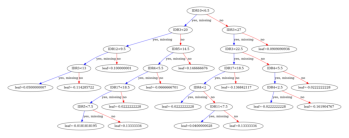

In [5]:
# 最优模型进行可解释性

# train_test_split 按比例划分原数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(all_R_H_IDR,input_lable,train_size=0.8,random_state = 20)
# 定义模型
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=8,random_state=0)
# 训练数据集
model = model.fit(Xtrain, Ytrain)
fig = xgb.plot_tree(model,num_trees=0,fmap='xgb.fmap')
# fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/rmsf_fig/fig5_1.jpg",dpi=900)

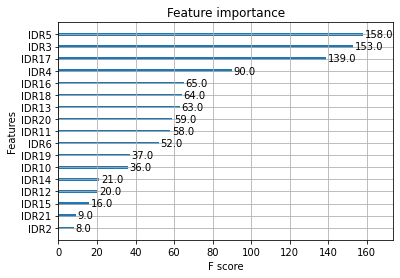

In [40]:
fig = xgb.plot_importance(model,fmap='xgb.fmap')
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/rmsf_fig/fig5_2.jpg",dpi=900)

Text(0, 0.5, 'Length')

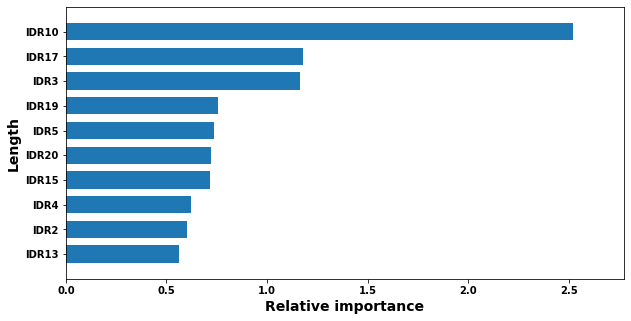

In [9]:
sns.set_context({'figure.figsize':[10, 5]})
fig = xgb.plot_importance(model,fmap='xgb.fmap',importance_type="gain",height=0.7,show_values = False,title='',grid=False,max_num_features=10)
xticks(weight='bold')
yticks(weight='bold')




xlabel('Relative importance',weight='bold',fontsize=14)
ylabel('Length',weight='bold',fontsize=14)
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/plot_importance/fig5_A_length.jpg",dpi=900)

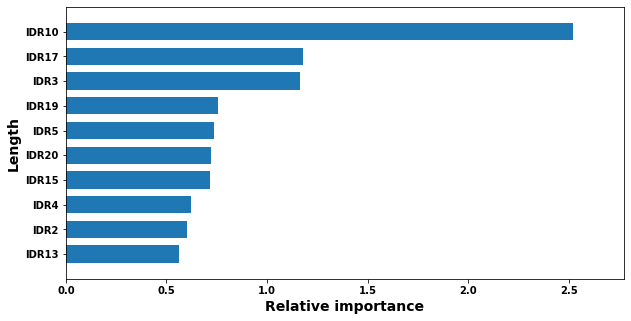

In [9]:
sns.set_context({'figure.figsize':[10, 5]})
fig = xgb.plot_importance(model,fmap='xgb.fmap',importance_type="gain",height=0.7,show_values = False,title='',grid=False,max_num_features=10)
xticks(weight='bold')
yticks(weight='bold')




xlabel('Relative importance',weight='bold',fontsize=14)
ylabel('Length',weight='bold',fontsize=14)
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/plot_importance/fig5_A_length.jpg",dpi=900)